In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [3]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
train_data.shape

(6019, 13)

In [9]:
train_data['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3093, dtype: int64

In [10]:
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [12]:
train_data.isnull().sum().tail()

Engine         36
Power          36
Seats          42
New_Price    5195
Price           0
dtype: int64

In [13]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 13)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [14]:
train_data = train_data.reset_index(drop=True)

## Feature Engineering

In [15]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [16]:
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [17]:
train_data['Power'][76]

'null bhp'

In [18]:
x = 'n'
count = 0
position = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [19]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop=True)

In [20]:
train_data.shape

(5872, 17)

In [21]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [22]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [23]:
for i in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[i,'New_Price']) == False:
        train_data.at[i,'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [24]:
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)

In [25]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80,NaN


In [26]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [27]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


## Data Visualization

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [29]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

(0.0, 160.0)

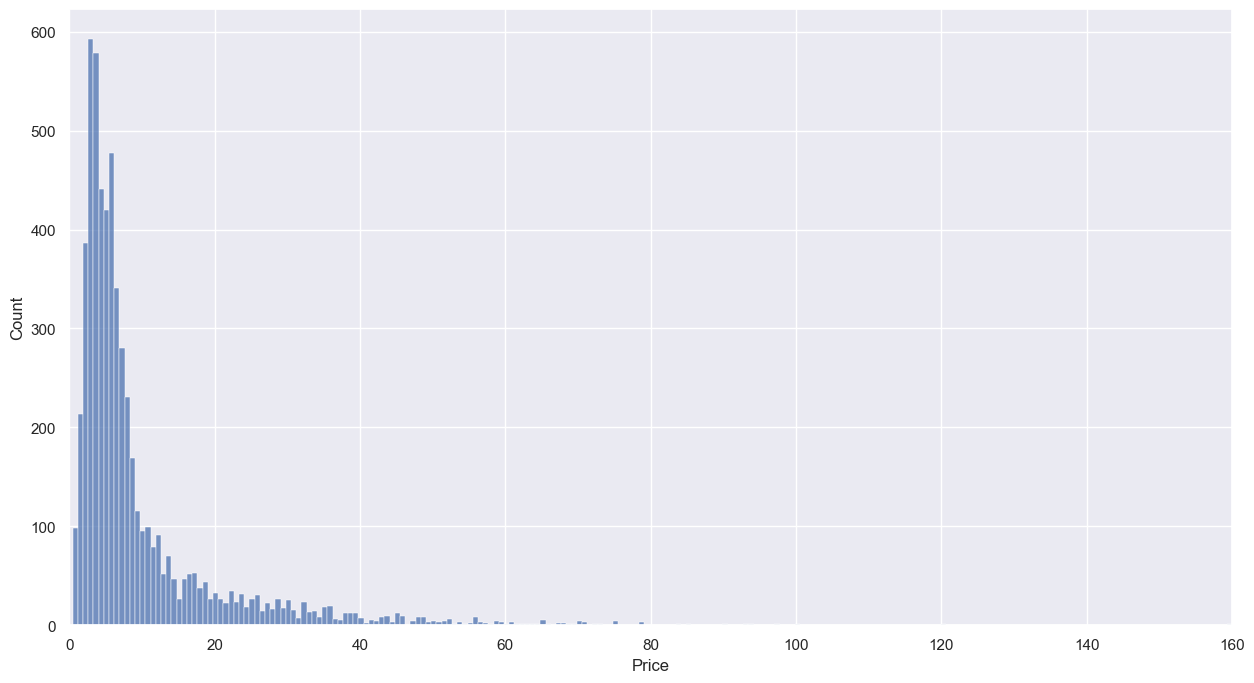

In [31]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Price'])
plt.xlim([0,160])

In [32]:
train_data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

(-0.5, 3.5, 0.0, 165.0)

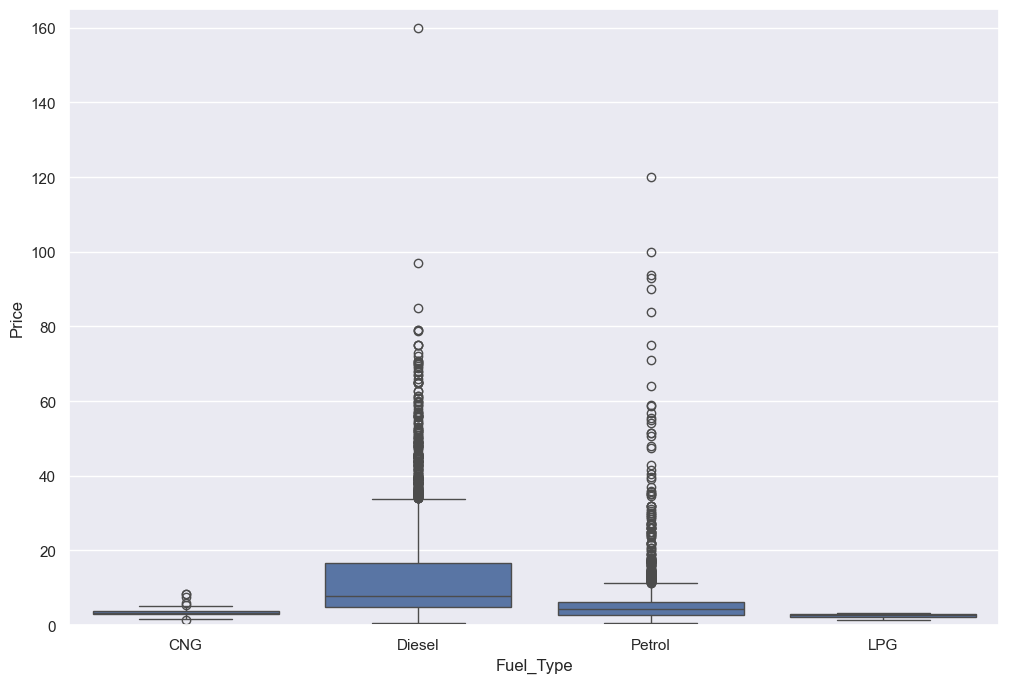

In [33]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165)

In [34]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train_data)

C:\Users\Sahil Bhatia\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000142E6712E80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

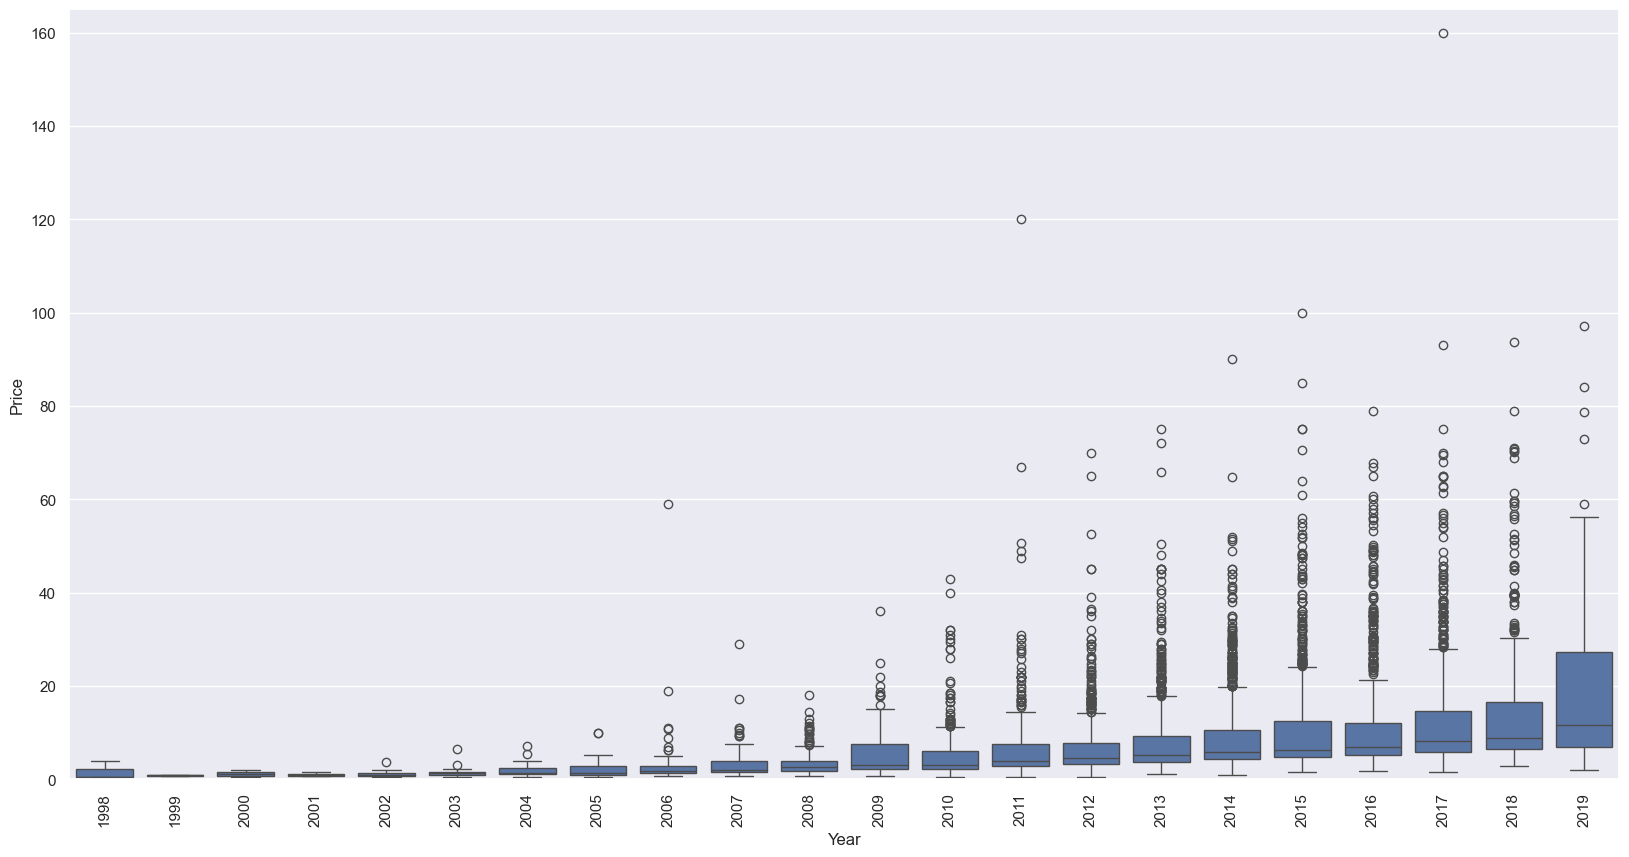

In [35]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<Axes: xlabel='Owner_Type', ylabel='Price'>

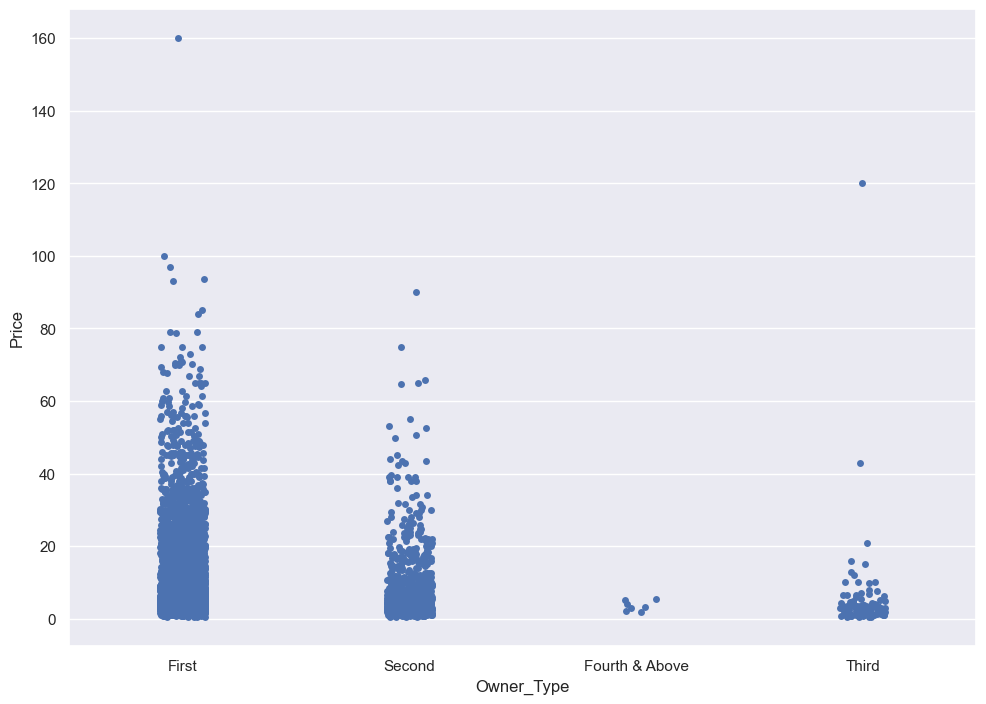

In [36]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data)

<Figure size 2000x1000 with 0 Axes>

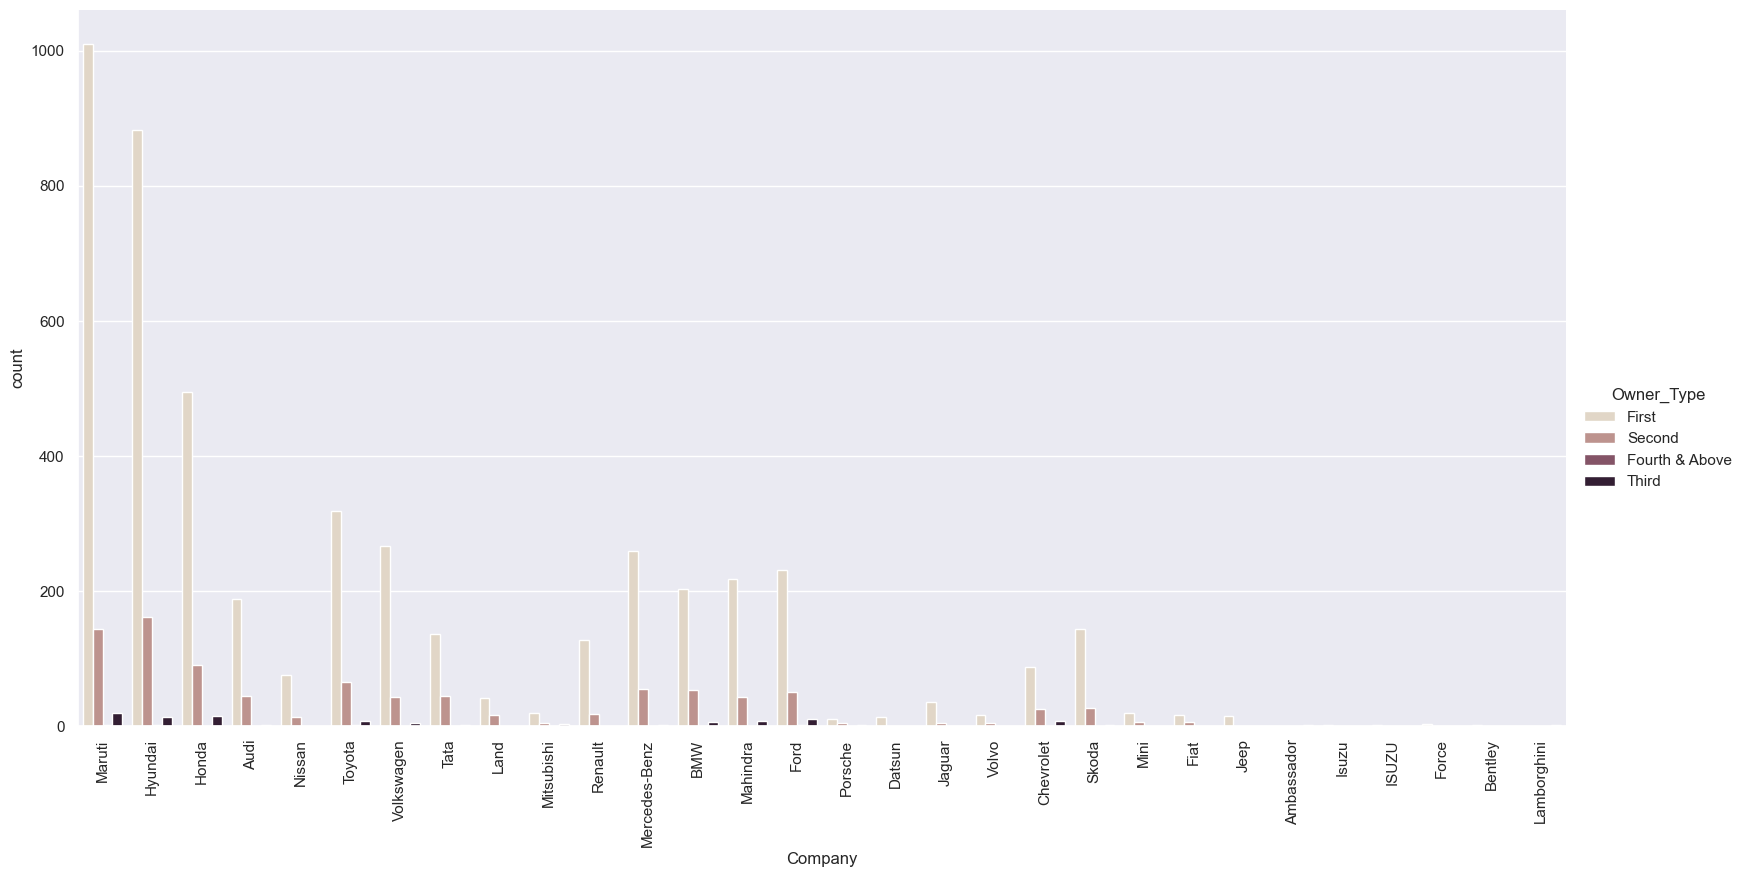

In [38]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data, hue='Owner_Type');
plt.xticks(rotation=90);

In [39]:
var = 'Location'
train_data[var].value_counts()

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

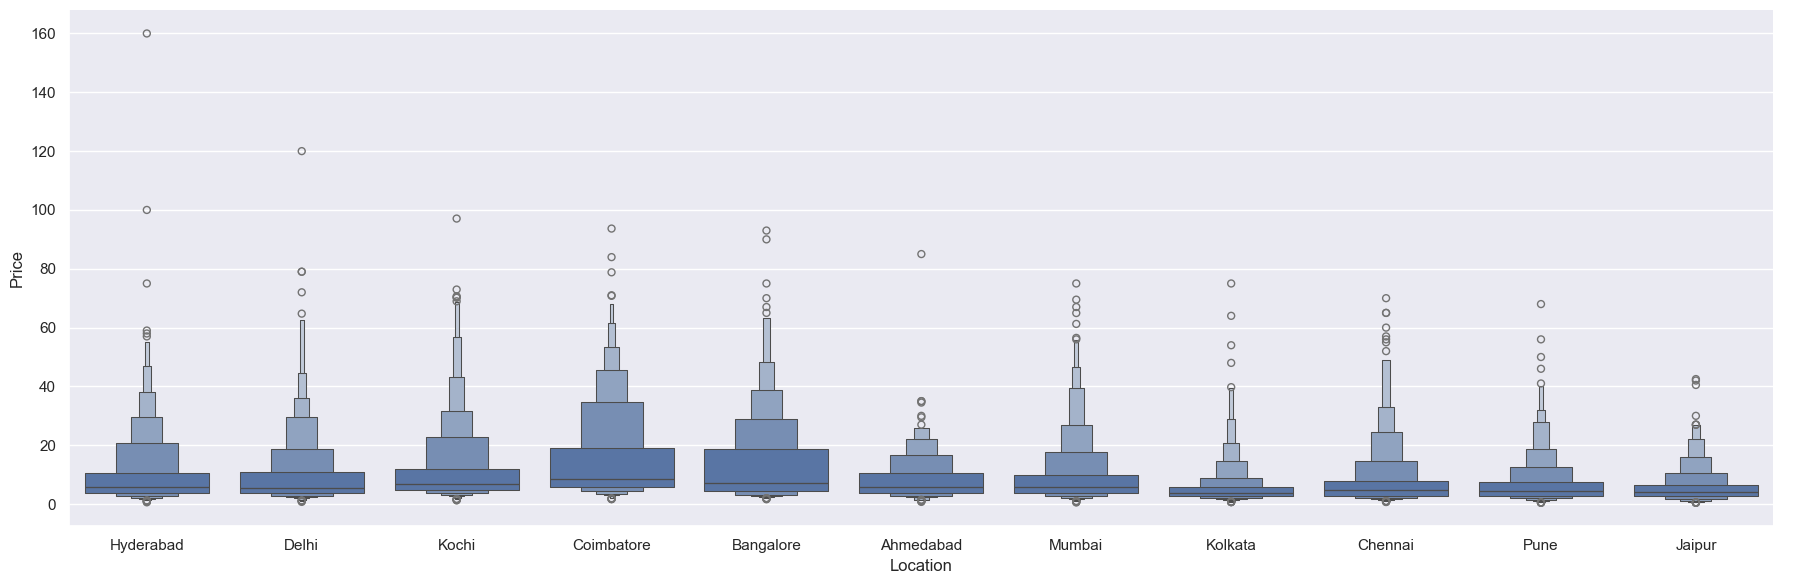

In [40]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [41]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


In [42]:
var = 'Fuel_Type'
train_data[var].value_counts()

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

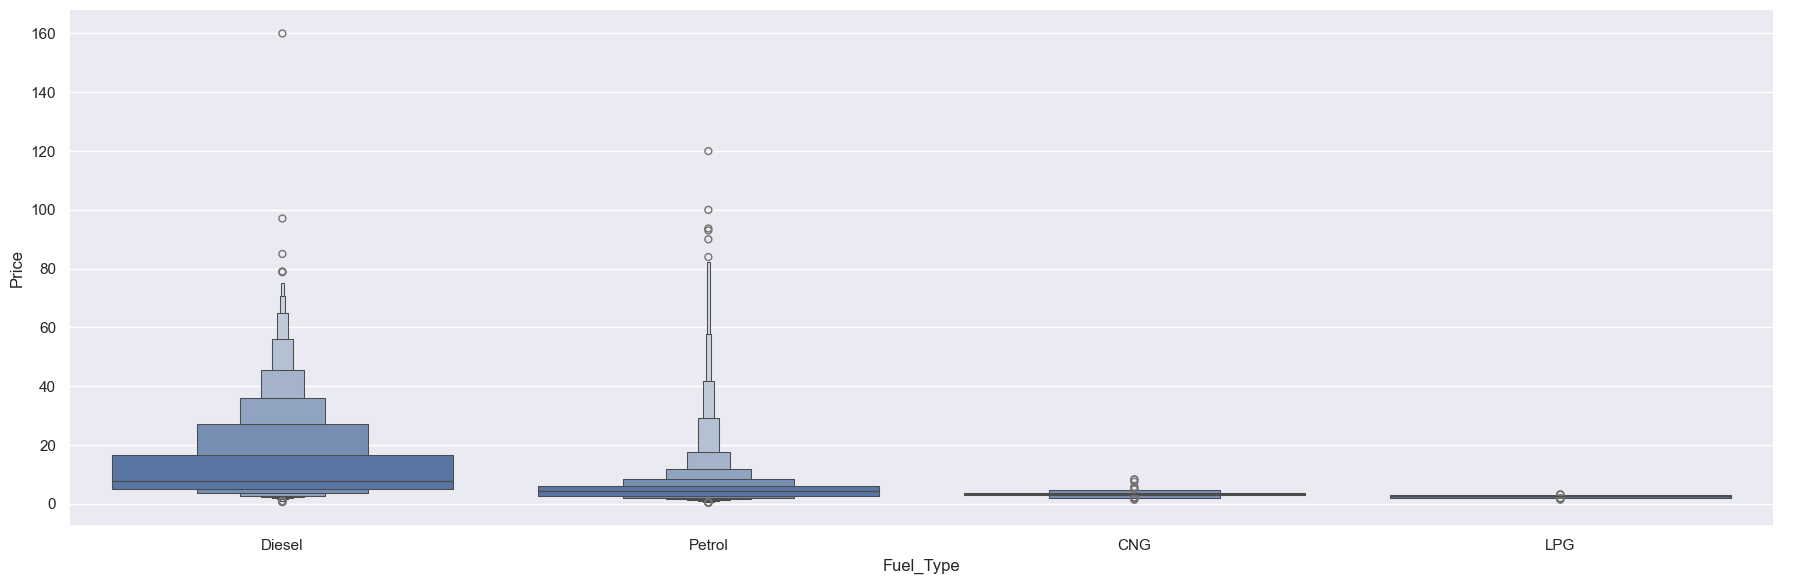

In [43]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [44]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,False,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,True,False,False


In [45]:
var = 'Transmission'
train_data[var].value_counts()

Transmission
Manual       4170
Automatic    1702
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

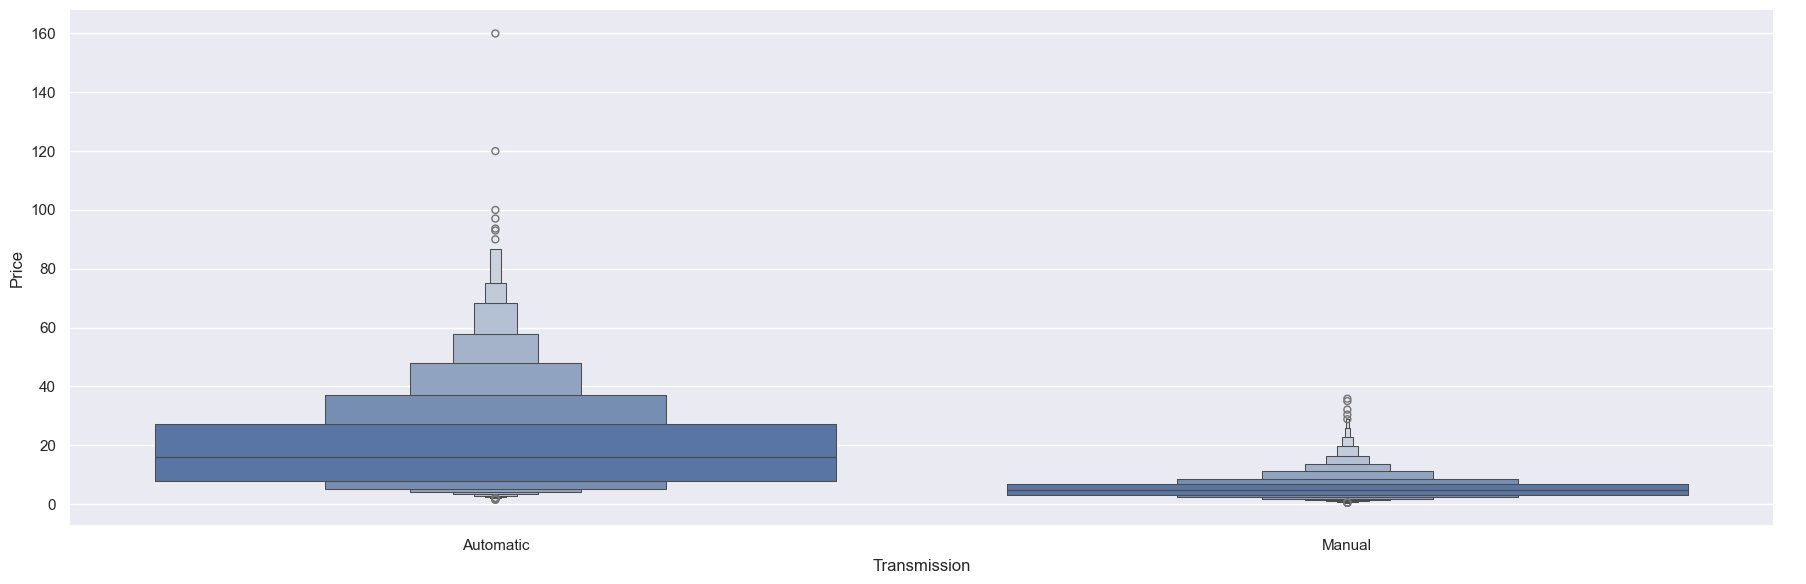

In [46]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [47]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,True
1,True
2,True
3,True
4,False


In [48]:
var = 'Owner_Type'
train_data[var].value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

In [49]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

C:\Users\Sahil Bhatia\AppData\Local\Temp\ipykernel_27064\1768149095.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [50]:
var = 'Company'
train_data[var].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

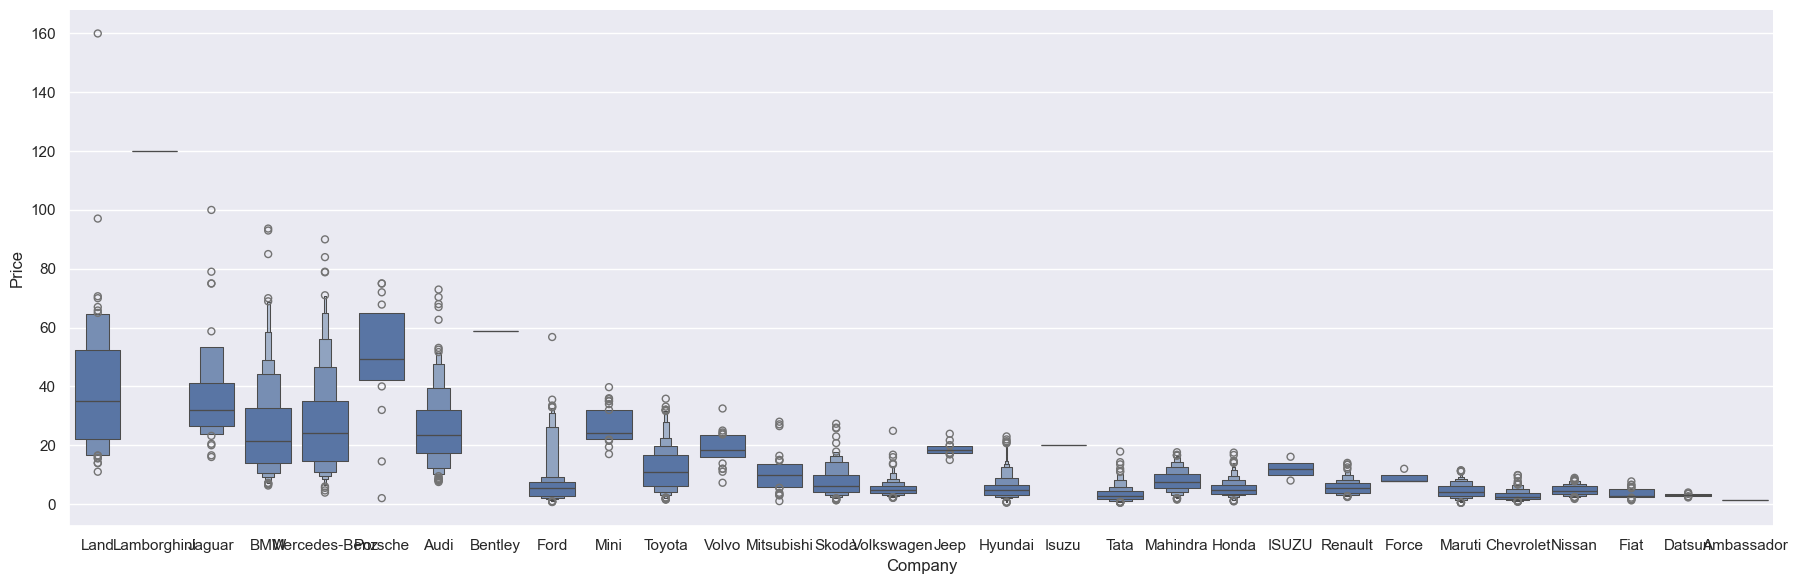

In [51]:
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [52]:
train_data.drop(["Company"],axis=1,inplace=True)

In [53]:
final_train= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,False,False,False,False,True,False,False,False,False,True
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,False,False,False,False,False,True,True,False,False,True
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,False,False,False,False,False,False,False,False,True,True
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,False,False,False,False,False,False,True,False,False,True
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,False,False,False,False,False,False,True,False,False,False


In [54]:
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,False,False,...,False,False,False,False,False,True,True,False,False,True
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,False,True,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,False,True,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,False,False,...,False,False,False,False,False,False,True,False,False,False


In [55]:
final_train.shape

(5872, 22)

In [56]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [58]:
test_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [59]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done')

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done')

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)

test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True)

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done')

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


C:\Users\Sahil Bhatia\AppData\Local\Temp\ipykernel_27064\3813213518.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)


In [60]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2013,54493,2,5.0,24.70,796.0,47.30,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,2017,34000,1,7.0,13.68,2393.0,147.80,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,2014,29000,1,5.0,18.50,1197.0,82.85,False,False,False,...,False,False,False,False,True,False,False,False,True,True
4,2016,85609,2,7.0,16.00,2179.0,140.00,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [61]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [62]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [63]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [64]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

ValueError: could not convert string to float: 'Mumbai'

<Figure size 1800x1800 with 0 Axes>